### 파이토치 텐서 만들기 
당일한 작성한코드 당일내에 해석 가능하도록 만들기

In [5]:
import torch 
import numpy as np 
np.set_printoptions(precision = 3) # 배열의 출력형식을 지정 -> precision = 3으로 설정하면 배열의 소수점 이하 숫자가 최대 3자리까지만 출력이 됨

In [6]:
a = [1,2,3] # 리스트 생성
b = np.array([4,5,6] , dtype = np.int32) # numpy 배열 생성
t_a = torch.tensor(a) # tensor로 변환
t_b = torch.from_numpy(b) # numpy 배열을 tensor로 변환

In [7]:
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [8]:
t_ones = torch.ones(2,3) # shape는 (2,3)으로 하고 원소들의 값은 모두 1로 저장
t_ones.shape

torch.Size([2, 3])

In [9]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [10]:
rand_tensor = torch.rand(2,3) # shape = (2,3) & 원소들의 값은 0 ~ 1사이 random값으로 지정
print(rand_tensor)

tensor([[0.1489, 0.6375, 0.5698],
        [0.4410, 0.1346, 0.8245]])


### 텐서의 타입과 크기 조작
사용하는 함수 : 
to ,
reshape , 
transpose ,
squeeze(차원 삭제)

### torch.to() : 텐서의 data type를 원하는 타입으로 변경

In [11]:
t_a_new = t_a.to(torch.int64) 
print(t_a_new.dtype)

torch.int64


In [12]:
# 텐서 전치하기 
t = torch.rand(3,5)
t_tr = torch.transpose(t , 0 , 1) 
print(t.shape , '-->' , t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [13]:
# 텐서 크기 바꾸기
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
print(t.shape) # 벡터에서
print(t_reshape.shape) # 5x6 행렬로 변환

torch.Size([30])
torch.Size([5, 6])


In [14]:
# 불필요한 차원 삭제하기
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t , 2)
print(t.shape , '--->' , t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) ---> torch.Size([1, 2, 4, 1])


### 텐서에서 수학연산 적용

In [15]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1 # (-1 , 1)사이 균등 분포 생성 , 각 원소들에 2만큼 스칼라배 후 -1
t2 = torch.normal(mean = 0 , std = 1 , size = (5,2)) # 원소들이 정규분포내에서 표본추출된 값
t3 = torch.multiply(t1 , t2) ; t3 # t1 , t2의 동일위치의 원소들끼리의 곱셉의 결과가 t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

### 특정축을 따라서 평균 , 합 , 표준편차 계산 
mean , sum , sd

In [16]:
t4 = torch.mean(t1 , axis = 0) # axis = 0 : 열을 기준으로 연산
print(t4) 

tensor([-0.1373,  0.2028])


In [17]:
# 두 행렬의 행렬곱
t5 = torch.matmul(t1 , torch.transpose(t2 , 0 , 1))
t5

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [18]:
# t1 , t2의 사이즈는 각각 5x2
t6 = torch.matmul(torch.transpose(t1 , 0 ,1) , t2)
t6

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

In [34]:
norm_t1 = torch.linalg.norm(t1  , ord = 2 , dim = 1) # dim = 0 : 열 기준 , dim = 1 : 행 기준
print(t1 , '\n') ; print(norm_t1)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]]) 

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


### 텐서의 분할
chunk : 현재 1개인 텐서를 2개이상으로 분할 , 
stack , 
cat 

In [35]:
torch.manual_seed(1)
t = torch.rand(6) # 1[6,] 텐서 생성
t

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])

In [36]:
t_splits = torch.chunk(t , 3) # para : a = 대상 행렬 , b = 분할 할 개수
[item.numpy() for item in t_splits] # numpy로 변환해서 분할된 텐서들을 출력

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [37]:
# 다른 분할 크기 전달하기
t = torch.rand(5) # [5,] 텐서 생성
t_splits = torch.split(t, split_size_or_sections=[3,2]) # 최초로 split되는 텐서는 [3,] 뒤에는 [2,] size로 split
[item.numpy() for item in t_splits]

[array([0.397, 0.754, 0.57 ], dtype=float32),
 array([0.439, 0.639], dtype=float32)]

### n개의 tensor를 연결하거나 쌓아서 하나의 텐서를 생성

In [38]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A , B] , axis = 0) # [5,]인  텐서를 생성 , cat (axis = 0) 행을 기준으로 2개의 텐서 결합
C

tensor([1., 1., 1., 0., 0.])

In [39]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A , B] , axis = 1) # axis = 0 : 행 , axis = 1 : 열 , 차원도 + 1됨 , 쌓는다라는 표현이 차원을 up시키는 것인듯
S

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

### 파이토치 DataLoader 생성하기

In [40]:
from torch.utils.data import DataLoader
t = torch.arange(6 , dtype = torch.float32) # 부동소수점으로 type을 설정하고 0 ~ 5를 원소로 입력 , dim = 1
data_loader = DataLoader(t)

In [41]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [42]:
# batch_size를 조정  
# batch_size를 간단하게 생각하면 리스트의 size를 조절해준다고 생각하면 될 듯
data_loader = DataLoader(t, batch_size=3 , drop_last=False) # drop_last = True로 해놓으면 batch_size의 숫자만큼 원소의 수를 채울 수 없다면 마지막 batch는 삭제해버림
for i , batch in enumerate(data_loader , 1): 
    print(f'배치 {i}' , batch)

배치 1 tensor([0., 1., 2.])
배치 2 tensor([3., 4., 5.])


In [43]:
# feature 텐서와 label텐서 합쳐보기 
t_x = torch.rand([4,3] , dtype = torch.float32) # feature tensor
t_y = torch.arange(4) # label tensor

In [44]:
# 두 텐서를 연결해서 dataset 만들기
# Dataset class 생성하기
from torch.utils.data import Dataset

class JointDataset(Dataset):
    # 데이터 필터링 등 초기화 로직이 발생하는 곳
    def __init__(self, x, y):
        self.x = x
        self.y = y 

    def __len__(self):
        return len(self.x)
        
    # 주어진 Index에 해당되는 샘플을 반환
    def __getitem__(self , idx):
        return self.x[idx] , self.y[idx]

In [45]:
joint_dataset = JointDataset(t_x , t_y)

In [46]:
for example in joint_dataset:
    print('X' , example[0] , 'Y' , example[1])

X tensor([0.4550, 0.5725, 0.4980]) Y tensor(0)
X tensor([0.9371, 0.6556, 0.3138]) Y tensor(1)
X tensor([0.1980, 0.4162, 0.2843]) Y tensor(2)
X tensor([0.3398, 0.5239, 0.7981]) Y tensor(3)


In [47]:
from torch.utils.data import TensorDataset

In [48]:
# 텐서형식의 데이터셋인 간단하게 torch.utils.data.TensorDataset을 이용해서 joint_dataset을 생성이 가능
joint_dataset = TensorDataset(t_x , t_y) 

### 원본특성과 레이블 사이의 원소별 대응이 깨지는 경우는 일반적인 오류
### 이런 오류를 해결하기 위해서 하나의 데이터셋으로 합치는것이 안전

셔플 , 배치 , 반복

신경망 모델을 훈련시키려면 traindata를 random으로 섞어주는 것이 유리
배치를 생성하는 것 외에도 데이터셋을 섞거나 재순환 하는 방법을 확인

In [50]:
torch.manual_seed(1)

# DataLoader이 입력된 데이터를 학습중에 셔플을 해주는 역할을 함
data_loader = DataLoader(dataset = joint_dataset , batch_size = 2 , shuffle=True)

In [54]:
# 기존에 존재하던 joint_data에서 sort 되어있던 데이터들을 dataloader에 입력함으로서 random하게 shuffle해줌

for i , batch in enumerate(data_loader , 1):
    print(f'배치{i}' , 'x : ' , batch[0] ,
         '\n y :' , batch[1])

배치1 x :  tensor([[0.3398, 0.5239, 0.7981],
        [0.1980, 0.4162, 0.2843]]) 
 y : tensor([3, 2])
배치2 x :  tensor([[0.4550, 0.5725, 0.4980],
        [0.9371, 0.6556, 0.3138]]) 
 y : tensor([0, 1])


n번의 epoch동안 train을 시킬 때 dataset을 원하는 epoch 수만큼 섞어서 반복해야함
즉 한 번의 epoch를 돌 때마다 dataset을 shuffle 해줘야 한다는 의미

In [56]:
for epoch in range(2):
    print(f'에포크 {epoch + 1}')
    for i , batch in enumerate(data_loader , 1):
        print(f'배치{i}' , 'x : ' , batch[0] ,
             '\n y :' , batch[1])

에포크 1
배치1 x :  tensor([[0.4550, 0.5725, 0.4980],
        [0.3398, 0.5239, 0.7981]]) 
 y : tensor([0, 3])
배치2 x :  tensor([[0.1980, 0.4162, 0.2843],
        [0.9371, 0.6556, 0.3138]]) 
 y : tensor([2, 1])
에포크 2
배치1 x :  tensor([[0.9371, 0.6556, 0.3138],
        [0.3398, 0.5239, 0.7981]]) 
 y : tensor([1, 3])
배치2 x :  tensor([[0.1980, 0.4162, 0.2843],
        [0.4550, 0.5725, 0.4980]]) 
 y : tensor([2, 0])


PIL의 image 모듈 : 이미지 파일의 내용을 읽고 , torchvision , tranform 이 원본 내용을 디코딩하고 이미지의 크기를 바꿈

In [58]:
import pathlib
imgdir_path = pathlib.Path('/Users/limpanhong/Desktop/cat_dog_images') # 이미지의 path를 불러와 저장
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')]) # jpg라는 확장자를 가진 폴더내의 이미지들을 file_list 변수에 저장
file_list

['/Users/limpanhong/Desktop/cat_dog_images/cat-01.jpg',
 '/Users/limpanhong/Desktop/cat_dog_images/cat-02.jpg',
 '/Users/limpanhong/Desktop/cat_dog_images/cat-03.jpg',
 '/Users/limpanhong/Desktop/cat_dog_images/dog-01.jpg',
 '/Users/limpanhong/Desktop/cat_dog_images/dog-02.jpg',
 '/Users/limpanhong/Desktop/cat_dog_images/dog-03.jpg']

Image shape (900, 1200, 3)
Image shape (900, 1200, 3)
Image shape (900, 742, 3)
Image shape (800, 1200, 3)
Image shape (800, 1200, 3)
Image shape (900, 1200, 3)


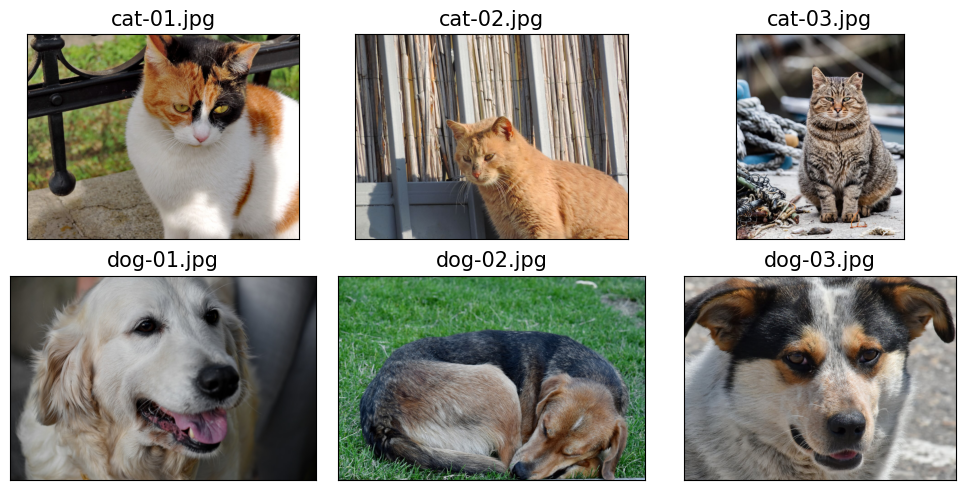

In [59]:
# matplotlib를 사용해서 이미지 호출 
import matplotlib.pyplot as plt
import os
from PIL import Image 

# 출력될 이미지의 사이즈 설정
fig = plt.figure(figsize = (10 , 5))

# 각 list의 index , image 할당
for i , file in enumerate(file_list):
    img = Image.open(file) # Image를 이용해서 image를 open
    print('Image shape' , np.array(img).shape) # open된 이미지의 shape를 출력
    ax = fig.add_subplot(2, 3 ,i + 1) # subplot을 설정해서 총 입력받은 이미지의 자리를 설정
    ax.set_xticks([]); ax.set_yticks([]) 
    ax.imshow(img) # 실제로 이미지 출력
    ax.set_title(os.path.basename(file) , size = 15) # 출력되는 이미지의 이름은 기존 파일에서 갖고있는 이름 그래도 설정

plt.tight_layout()
plt.show()

In [60]:
labels = [1 if 'dog' in os.path.basename(file) else 0 # 개와 고양이 구분을 위해서 개는 1 , 고양이는 0으로 설정
         for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

feature 파일과 label 파일이 생성되었음으로 joint_dataset을 생성

In [62]:
# 파일 이름과 레이블을 갖고 있는 dataset생성
class ImageDataset(Dataset):
    def __init__(self , file_list , labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self , index):
        file = self.file_list[index]
        label = self.labels[index]
        return file , label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list , labels)
for file , label in image_dataset:
    print(file , label)

/Users/limpanhong/Desktop/cat_dog_images/cat-01.jpg 0
/Users/limpanhong/Desktop/cat_dog_images/cat-02.jpg 0
/Users/limpanhong/Desktop/cat_dog_images/cat-03.jpg 0
/Users/limpanhong/Desktop/cat_dog_images/dog-01.jpg 1
/Users/limpanhong/Desktop/cat_dog_images/dog-02.jpg 1
/Users/limpanhong/Desktop/cat_dog_images/dog-03.jpg 1


In [65]:
# 이미지를 resize하기위한 변수 생성

import torchvision.transforms as transforms
img_height , img_width = 80 , 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height , img_width))
])

In [66]:
# 위의 생성한 변수를 사용하기 위해서 class를 수정
# 중간에 transform을 입력해줌으로서 이 class를 거친 이미지는 (80 , 120)size로 transform됨

class ImageDataset(Dataset):
    def __init__(self , file_list , labels , transform):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self , index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img  = self.transform(img)    
        label = self.labels[index]
        return img , label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list , labels , transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


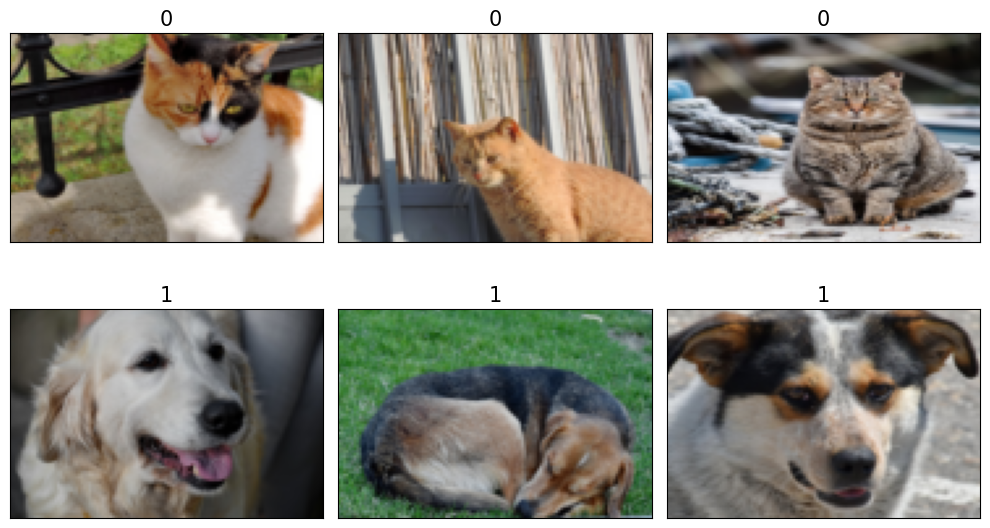

In [67]:
fig = plt.figure(figsize = (10 , 6))
for i , example in enumerate(image_dataset):
    ax = fig.add_subplot(2 ,3 , i +1)
    ax.set_xticks([]) ; ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose(1,2,0))
    ax.set_title(f'{example[1]}' , size = 15)

plt.tight_layout()
plt.show()

In [68]:
import torchvision

### 파이토치로 신경망 만들기
파이토치의 신경망 모듈 (torch.nn)

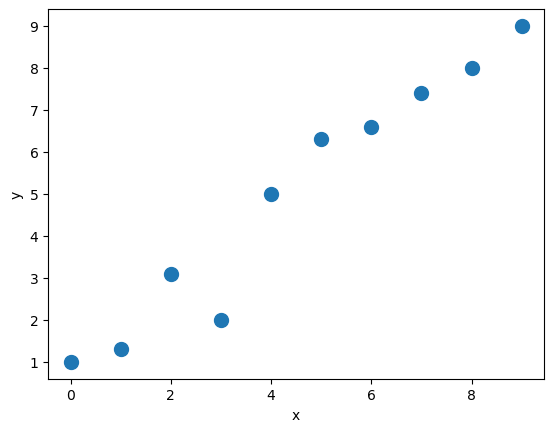

In [73]:
# 선형회귀 모델만들기
X_train = np.arange(10 , dtype = 'float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,6.3, 6.6, 7.4, 8.0,9.0] , dtype = 'float32')
plt.plot(X_train , y_train , 'o' , markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [88]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train) # 생성된 데이터를 정규화
X_train_norm = torch.from_numpy(X_train_norm) # numpy 배열로 변환
# y_train = torch.from_numpy(y_train).float() 
y_train =  torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm , y_train) # train_data_set , Dataset함수를 이용해서 dataset 생성
batch_size = 1 
train_dl = DataLoader(train_ds , batch_size , shuffle=True) 

TypeError: expected np.ndarray (got Tensor)

In [90]:
# 선형회귀 모델 정의

torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1 , requires_grad = True)

def model(xb):
    return xb @ weight + bias

In [91]:
# MSE사용

def loss_fn(input , target):
    return(input - target).pow(2).mean()

In [93]:
# 직접 SGD를 작성해서 사용
# 후에는 torch.optim에서 SGD함수를 이용 

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch , y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred , y_batch.long()) # 값의 type을 long(정수)로 변경시켜줌
        loss.backward() # 이렇게 backward만 설정해주면 역전파 연산이 자동으로 일어남

    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f'에포크{epoch} 손실 {loss.item() : 4f}') #loss.item() 계산된 loss 값을 스칼라값으로 가져옴

에포크0 손실  0.009415
에포크10 손실  0.001528
에포크20 손실  0.175737
에포크30 손실  0.612709
에포크40 손실  0.265222
에포크50 손실  0.268689
에포크60 손실  0.476026
에포크70 손실  1.915415
에포크80 손실  0.001706
에포크90 손실  0.002110
에포크100 손실  0.000345
에포크110 손실  0.455820
에포크120 손실  0.280574
에포크130 손실  0.452024
에포크140 손실  0.450632
에포크150 손실  1.951102
에포크160 손실  0.038391
에포크170 손실  0.016800
에포크180 손실  0.283290
에포크190 손실  0.283500


In [96]:
# 훈련된 모델을 확인하기 위해서 그래프를 그려보자
print('최종 파라미터 :' , weight.item() , bias.item()) # 가중치와 편향 

최종 파라미터 : 2.680170774459839 4.7985148429870605


In [102]:
X_test = np.linspace(0 , 9 , num = 100 , dtype = 'float32').reshape(-1 , 1) # 0 ~ 9사이의 값을 100개 생성
# reshape를 해줘서 행벡터를 열벡터 형태로 변경시킴

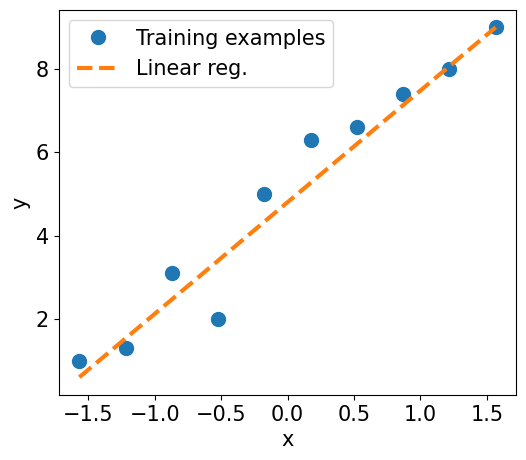

In [111]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach() # model(X_test_norm)을 기준으로 데이터를 생성하지만 연관성? 의존성은 없음 그냥 데이터를 생성할 기반으로만 설정하고 끝 

## ================== ##
# 여기서부터 그림 그리기 

fig =  plt.figure(figsize = (13  , 5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm , y_train , 'o' , markersize = 10)
plt.plot(X_test_norm , y_pred , '--' , lw = 3)
plt.legend(['Training examples' , 'Linear reg.'] , fontsize = 15)
ax.set_xlabel('x' , size = 15)
ax.set_ylabel('y' , size = 15)
ax.tick_params(axis =  'both' , which = 'major' , labelsize = 15)
plt.show()

### torch.nn과 torch.optim으로 모델 훈련하기

In [148]:
import torch.nn as nn 
loss_fn = nn.MSELoss(reduction = 'mean') # 손실함수는 MSE로 
input_size = 1
output_size = 1
model = nn.Linear(input_size , output_size) # 선형회귀함수 -> y = ax정도
optimizer = torch.optim.SGD(model.parameters() , lr = learning_rate) # 최적화 모델 -> 가장 적합한 파라미터 찾기 -> 즉 오류 줄이기

In [149]:
# model train을 위해서 optimizer 객체의 step()함수 사용

for epoch in range(num_epochs):
    for x_batch , y_batch in train_dl:
        pred = model(x_batch)[: , 0]
        loss = loss_fn(pred , y_batch)
        loss.backward() # loss 계산
        optimizer.step() # 파라미터 업데이트
        optimizer.zero_grad() # 기울기 0으로 초기화

    if epoch % log_epochs == 0 :
        print(f'에포크 {epoch} 손실 {loss.item() : 4f}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x4 and 1x1)

In [138]:
print("최종 파라미터 : " , model.weight.item() , model.bias.item())

최종 파라미터 :  -0.38639891147613525 -0.025753021240234375


### 아이리스 데이터 분류 다층 퍼셉트론

In [139]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 1./3 , random_state = 1
)

In [140]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm , y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds , batch_size , shuffle=True)

In [153]:
# 신경망 만들기
class Model(nn.Module):
    def __init__(self , input_size , hidden_size ,output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size , hidden_size)
        self.layer2 = nn.Linear(hidden_size , output_size)
    def forward(self , x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return x

In [154]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size , hidden_size , output_size)

In [155]:
learning_rate = 0.001 # 학습률
loss_fn = nn.CrossEntropyLoss() # 손싫함수는 크로스 엔트로피 
optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate) # 최적화함수는 아담

In [156]:
num_epochs = 100
loss_hist = [0] * num_epochs 
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch , y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred , y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred , dim = 1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

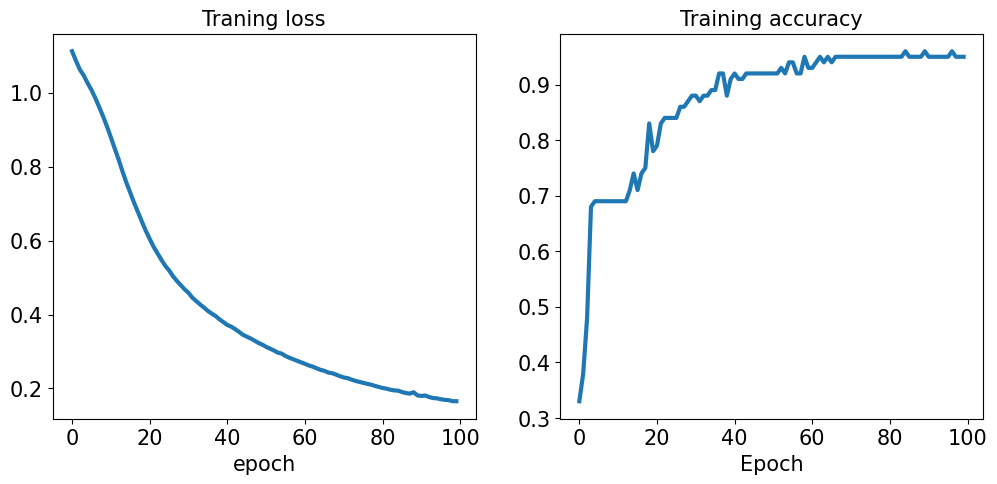

In [159]:
# 그래프 그리기 
fig = plt.figure(figsize = (12 , 5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist , lw = 3)
ax.set_title("Traning loss" , size = 15)
ax.set_xlabel('epoch' , size = 15)
ax.tick_params(axis = 'both' , which = 'major' , labelsize = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist , lw = 3)
ax.set_title("Training accuracy" , size = 15)
ax.set_xlabel("Epoch" , size = 15)
ax.tick_params(axis = 'both' , which = 'major' , labelsize = 15)
plt.show()

In [162]:
# 테스트 데이터셋에서 모델 평가하기 
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test , dim = 1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도 : {accuracy : .4f}')

TypeError: expected np.ndarray (got Tensor)

### 훈련된 모델 저장하고 로드하기 

In [163]:
path = "/Users/limpanhong/Desktop/iris_classifier.pt" # path 지정해서 저장
torch.save(model , path)

In [164]:
model_new = torch.load(path) # 저장한 모델 불러오기

In [166]:
model_new.eval() # 모델 아키텍쳐 확인

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [168]:
# 다시 호출해도 동일한 데이터셋을 이용했을 때 정확도가 유지 되는지 확인
pred_test = model_new(X_test_norm) 
correct = (torch.argmax(pred_test  , dim = 1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도 : {accuracy : .4f}')

테스트 정확도 :  0.9800


In [169]:
# 학습된 모델의 파라미터만 저장
path = '/Users/limpanhong/Desktop/Programing/Pytorch/iris_classifier_state.pt'
torch.save(model.state_dict() , path)

In [170]:
# 저장된 파라미터를 호출
model_new = Model(input_size , hidden_size , output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>